<a href="https://colab.research.google.com/github/JAVerduzco/Mexico-s-energy-analysis-2020/blob/main/Cap3_Analisis_plantas_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se provee una base de datos de plantas de generacion (actualizada hasta 2018). Cada fila es una planta. Datos a nivel SEN.

In [1]:
import pandas as pd
plantas_url = 'https://github.com/JAVerduzco/Mexico-s-energy-analysis-2020/raw/b6d95d02983d964a25c3c118a6ccdd3a3daec78a/BDGPIIRCE.xlsx'
plantas = pd.read_excel(plantas_url)

In [2]:
plantas

,Central/Proyecto 1/,Tecnología,Combustible,Clave de combustible 2/,Región de Control,Región de Transmisión,Unidad a retirar,Capacidad (MW),Capacidad Firme (MW),Régimen Térmico (GJ/MWh) 7/,Usos propios (%),Costos Variables (dólares/MWh),Costos Fijos (dolares/kW/año),Tasa de mantenimiento (%),Tasa de salida forzada (%),Costo de inversión (dólares/kW),Vida Económica (años),Año de instalación,Tiempo medio de reparación\n(horas)
0,Baja California III (La Jovita),Ciclo Combinado,Gas Natural,GN_JOV,08-Baja California,47-Ensenada,NaN,294,285,7.0,3,3.0,16,5.2,8.8,NaN,NaN,NaN,24
1,Cerro Prieto I U5,Geotérmica,NaN,NaN,08-Baja California,48-Mexicali,ü,30,29,NaN,5,0.0,84,5.4,13.2,NaN,NaN,NaN,24
2,Cerro Prieto II U1,Geotérmica,NaN,NaN,08-Baja California,48-Mexicali,NaN,110,104,NaN,5,0.0,84,5.4,13.2,NaN,NaN,NaN,24
3,Cerro Prieto II U2,Geotérmica,NaN,NaN,08-Baja California,48-Mexicali,NaN,110,104,NaN,5,0.0,84,5.4,13.2,NaN,NaN,NaN,24
4,Cerro Prieto III U1,Geotérmica,NaN,NaN,08-Baja California,48-Mexicali,NaN,110,104,NaN,5,0.0,84,5.4,13.2,NaN,NaN,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Mazatlán II (José Aceves Pozos) U3,Termoeléctrica convencional,Gas Natural,GN_MAZ,04-Noroeste,06-Mazatlán,NaN,300,276,21.0,8,2.0,29,13.0,6.7,NaN,NaN,NaN,24
765,Topolobampo II (Juan de Dios Bátiz) U1,Termoeléctrica convencional,Gas Natural,GN_TOPO,04-Noroeste,04-Los Mochis,ü,160,147,21.0,8,3.0,36,13.0,6.7,NaN,NaN,NaN,24
766,Topolobampo II (Juan de Dios Bátiz) U2,Termoeléctrica convencional,Gas Natural,GN_TOPO,04-Noroeste,04-Los Mochis,ü,160,147,21.0,8,3.0,36,13.0,6.7,NaN,NaN,NaN,24
767,Villa de Reyes U1,Termoeléctrica convencional,Gas Natural,GN_TAMZ,03-Occidental,25-San Luis Potosí,NaN,350,322,21.0,8,2.0,29,10.1,6.7,NaN,NaN,NaN,24


In [3]:
plantas.columns

Index(['Central/Proyecto 1/', 'Tecnología', 'Combustible',
       'Clave de combustible 2/', 'Región de Control', 'Región de Transmisión',
       'Unidad a retirar', 'Capacidad (MW)', 'Capacidad Firme (MW)',
       'Régimen Térmico (GJ/MWh) 7/', 'Usos propios (%)',
       'Costos Variables (dólares/MWh)', 'Costos Fijos (dolares/kW/año)',
       'Tasa de mantenimiento (%)', 'Tasa de salida forzada (%)',
       'Costo de inversión (dólares/kW)', 'Vida Económica (años)',
       'Año de instalación', 'Tiempo medio de reparación\n(horas)'],
      dtype='object')

Conocer combustibles utilizados en México.

In [4]:
set(plantas['Combustible'])

{'Bagazo de caña',
 'Biogás',
 'Carbón',
 'Combustóleo ',
 'Coque',
 'Diésel',
 'Gas L.P.',
 'Gas Natural',
 'Gas residual',
 'Uranio',
 'Vapor',
 nan}

In [5]:
set(plantas['Tecnología'])

{'Bioenergía',
 'Carboeléctrica',
 'Ciclo Combinado',
 'Ciclo combinado',
 'Cogeneración Eficiente',
 'Combustión Interna',
 'Combustión interna',
 'Eólica',
 'Geotérmica',
 'Hidroeléctrica',
 'Lecho Fluidizado',
 'Nucleoeléctrica',
 'Solar fotovoltaica',
 'Termoeléctrica Convencional',
 'Termoeléctrica convencional',
 'Turbogás'}

Para reemplazar una mala etiqueta podemos usar el siguiente método.

In [6]:
plantas.replace('Ciclo Combinado','Ciclo combinado',inplace=True)
plantas.replace('Combustión Interna', 'Combustión interna',inplace=True)
plantas.replace('Termoeléctrica Convencional', 'Termoeléctrica convencional',inplace=True)
set(plantas['Tecnología'])

{'Bioenergía',
 'Carboeléctrica',
 'Ciclo combinado',
 'Cogeneración Eficiente',
 'Combustión interna',
 'Eólica',
 'Geotérmica',
 'Hidroeléctrica',
 'Lecho Fluidizado',
 'Nucleoeléctrica',
 'Solar fotovoltaica',
 'Termoeléctrica convencional',
 'Turbogás'}

Quiero conocer la cantidad de MW instalados por tecnología en cada Gerencia de Control.

In [7]:
tec_plantas = plantas.groupby(['Región de Control','Tecnología'])['Capacidad Firme (MW)'].sum().reset_index()
tec_plantas

,Región de Control,Tecnología,Capacidad Firme (MW)
0,01-Central,Bioenergía,34
1,01-Central,Carboeléctrica,2579
2,01-Central,Ciclo combinado,783
3,01-Central,Cogeneración Eficiente,81
4,01-Central,Combustión interna,28
...,...,...,...
73,10-Mulegé,Combustión interna,39
74,10-Mulegé,Eólica,0
75,10-Mulegé,Geotérmica,10
76,10-Mulegé,Solar fotovoltaica,0


In [8]:
#usamos pivot para crear tabla donde las filas sean tipo de tecnología
tec_pivot = tec_plantas.pivot(index='Región de Control', columns='Tecnología',values='Capacidad Firme (MW)')
tec_pivot

Tecnología,Bioenergía,Carboeléctrica,Ciclo combinado,Cogeneración Eficiente,Combustión interna,Eólica,Geotérmica,Hidroeléctrica,Lecho Fluidizado,Nucleoeléctrica,Solar fotovoltaica,Termoeléctrica convencional,Turbogás
Región de Control,,,,,,,,,,,,,
01-Central,34.0,2579.0,783.0,81.0,28.0,NaN,NaN,1456.0,NaN,NaN,0.0,2021.0,555.0
02-Oriental,217.0,NaN,3822.0,755.0,103.0,505.0,65.0,4900.0,NaN,1552.0,NaN,2219.0,334.0
03-Occidental,153.0,NaN,2535.0,10.0,107.0,14.0,247.0,2668.0,NaN,NaN,0.0,2521.0,338.0
04-Noroeste,NaN,NaN,1459.0,14.0,10.0,0.0,NaN,230.0,NaN,NaN,0.0,1927.0,65.0
05-Norte,11.0,NaN,2742.0,NaN,61.0,NaN,NaN,36.0,NaN,NaN,7.0,931.0,155.0
06-Noreste,58.0,2412.0,9213.0,177.0,117.0,158.0,NaN,96.0,538.0,NaN,NaN,1031.0,718.0
07-Penínsular,12.0,NaN,1348.0,13.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,329.0,377.0
08-Baja California,NaN,NaN,1750.0,21.0,5.0,0.0,541.0,NaN,NaN,NaN,0.0,294.0,404.0
09-Baja California Sur,NaN,NaN,NaN,NaN,304.0,NaN,NaN,NaN,NaN,NaN,0.0,105.0,310.0


Crear mapa de calor con seaborn

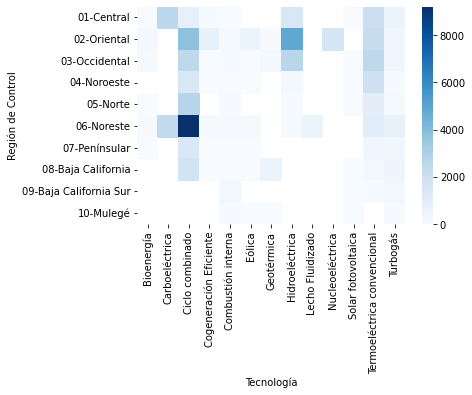

In [9]:
import seaborn as sns
sns.heatmap(tec_pivot, cmap='Blues')

Obtenemos un dataframe con los datos de capacidad instalada firme de ciclos combinado por GCR

In [10]:
ciclos = tec_plantas.loc[tec_plantas['Tecnología']=='Ciclo combinado']
ciclos

,Región de Control,Tecnología,Capacidad Firme (MW)
2,01-Central,Ciclo combinado,783
10,02-Oriental,Ciclo combinado,3822
20,03-Occidental,Ciclo combinado,2535
29,04-Noroeste,Ciclo combinado,1459
38,05-Norte,Ciclo combinado,2742
46,06-Noreste,Ciclo combinado,9213
55,07-Penínsular,Ciclo combinado,1348
61,08-Baja California,Ciclo combinado,1750


<BarContainer object of 8 artists>

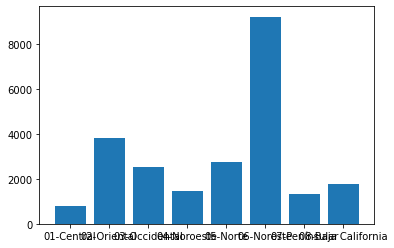

In [11]:
import matplotlib.pyplot as plt
#plt.xticks('90')
plt.bar(ciclos['Región de Control'],ciclos['Capacidad Firme (MW)'])

In [12]:
import plotly.express as px
px.bar(ciclos, x='Región de Control', y='Capacidad Firme (MW)')

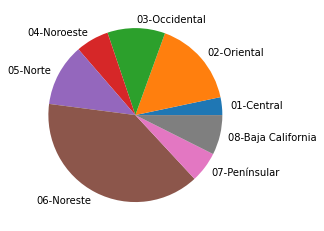

In [13]:
# Grafica de pastel de CC por GCR
pie_fig = plt.pie(ciclos['Capacidad Firme (MW)'],labels=ciclos['Región de Control'])


#   Plotly

In [14]:
import plotly.express as px
px.pie(ciclos,values='Capacidad Firme (MW)', names='Región de Control', title='Capacidad Ciclo Combinado')

In [18]:
px.bar(ciclos, y='Capacidad Firme (MW)', x='Región de Control')

In [20]:
ciclos


,Región de Control,Tecnología,Capacidad Firme (MW)
2,01-Central,Ciclo combinado,783
10,02-Oriental,Ciclo combinado,3822
20,03-Occidental,Ciclo combinado,2535
29,04-Noroeste,Ciclo combinado,1459
38,05-Norte,Ciclo combinado,2742
46,06-Noreste,Ciclo combinado,9213
55,07-Penínsular,Ciclo combinado,1348
61,08-Baja California,Ciclo combinado,1750
